#### ML03: ML Project Part 1

**Introduction**

So we've looked at a couple of ML algorithms and applied them to some nice clean datasets and managed to get some reasonable results. Well done us! However, ML in the real world is a lot tougher. We're going to have to deal with dodgy datasets and work hard to get meaningful results out of our algorithms! So, over the course of the next few sections of this training, we're going to look at a much larger ML project more representative of the kind of thing we'll get asked in real life.

This project will span multiple chapters and we'll be exploring a lot of new techniques throughout the course of it. We'll also be exploring best practice in approaching ML projects in general, and as such I've divided this and the following sections into steps.

**Step 1: Identify the ML Task** 

Before we get into our ML task, I want to introduce you to [Kaggle](https://www.kaggle.com/). Kaggle is a great website for data science and ML and they have a ton of example projects in notebook format for you to go through. This is a really good way to get an insight into experienced data scientist's workflow and a really good source of learning. On top of that they have a lot of cool [Datasets](https://www.kaggle.com/datasets) for you to download and practice on and regularly run [Competitions](https://www.kaggle.com/challenge-yourself) where you can compete to build ML algorithms and see how these fare against the rest of Kaggle!

For our project we're going to be using a Kaggle competition: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). This is a relatively simple competition but not so simple as the tasks we looked at in the first two chapters! Our remit is as follows:

*The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.*

*One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.*

*In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.*

We can see here that since we're being asked to predict whether or not something happened, that this is a classification task, similar to our first project on the Iris dataset.

**Step 2: Obtain, Import and Investigate the Data**

Once you have your ML task you'll want to start looking at the data! Kaggle have provided us train and test datasets, with the test dataset having the appropriate label variable (survival) removed. These are saved in the `data` folder in the root directory of this repo, but are freely available from Kaggle also.

Let's start by importing our favourite libraries:


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We can then import the data as follows:

In [52]:
path = '../data/'

# Importing the datasets and concatanating them
df = pd.read_csv('{}titanic_train.csv'.format(path))

df.columns = [
    x.lower() for x in df.columns
]

print('Total Records: ',len(df))
df

Total Records:  891


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The variable descriptions are as follows:

* age: Passenger’s age
* cabin: Passenger's cabin
* embarked: The port at which the passenger embarked (Southampton, Queenstown or Cherbourg)
* fare: The fare the passenger paid
* name: The passenger's name
* parch: The number of parents / children aboard
* passengerid: Unique ID for each passenger
* pclass: The class that the passenger was travelling in
* sex: The sex of the passenger
* sibsp: The number of siblings aboard
* survived: Whether the passenger survived
* ticket: The passenger's ticket number


**Basic Cleaning: Categorical Variables**

We can see that we have some categorical variables in the dataset, including `name`, `sex`, `ticket`, `cabin` and `embarked`. It's important to note that when we run our exploratory analysis these variables won't be included unless we can convert them to numeric variables. We can do this by getting the unique values, placing these into a dictionary and then using the `.replace()` method to convert them to a number. We'll do this for the 'sex' and 'embarked' variables as the others will have too high a cardinality to provide any meaningful insight.

Note that we're not starting the indexing from 0 as some of the tools we'll be using later on will flag this is as a null or missing value.

In [53]:
print('Sex values: ',list(df['sex'].unique()))
print('Embarked values: ', list(df['embarked'].unique()))

Sex values:  ['male', 'female']
Embarked values:  ['S', 'C', 'Q', nan]


In [54]:
# Fill the nan values in embarked with '' to make dealing with them easier
df['embarked'].fillna('')

sex_codes = {
    'male' : 0,
    'female' : 1,
}

embarked_codes = {
    'S': 1,
    'Q': 2,
    'C': 3,
    '': None
}

# Replace the categorical values with the values from the codes dictionaries
df['sex'].replace(sex_codes, inplace=True)
df['embarked'].replace(embarked_codes, inplace=True)
df.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


**Data Exploration**

We'll start by exploring the dataset in a similar manner to prevoiusly.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null int64
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [56]:
df_corr = df.corr()
df_corr.round(1)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
passengerid,1.0,-0.0,-0.0,-0.0,0.0,-0.1,-0.0,0.0,-0.0
survived,-0.0,1.0,-0.3,0.5,-0.1,-0.0,0.1,0.3,0.2
pclass,-0.0,-0.3,1.0,-0.1,-0.4,0.1,0.0,-0.5,-0.2
sex,-0.0,0.5,-0.1,1.0,-0.1,0.1,0.2,0.2,0.1
age,0.0,-0.1,-0.4,-0.1,1.0,-0.3,-0.2,0.1,0.0
sibsp,-0.1,-0.0,0.1,0.1,-0.3,1.0,0.4,0.2,-0.1
parch,-0.0,0.1,0.0,0.2,-0.2,0.4,1.0,0.2,-0.0
fare,0.0,0.3,-0.5,0.2,0.1,0.2,0.2,1.0,0.2
embarked,-0.0,0.2,-0.2,0.1,0.0,-0.1,-0.0,0.2,1.0


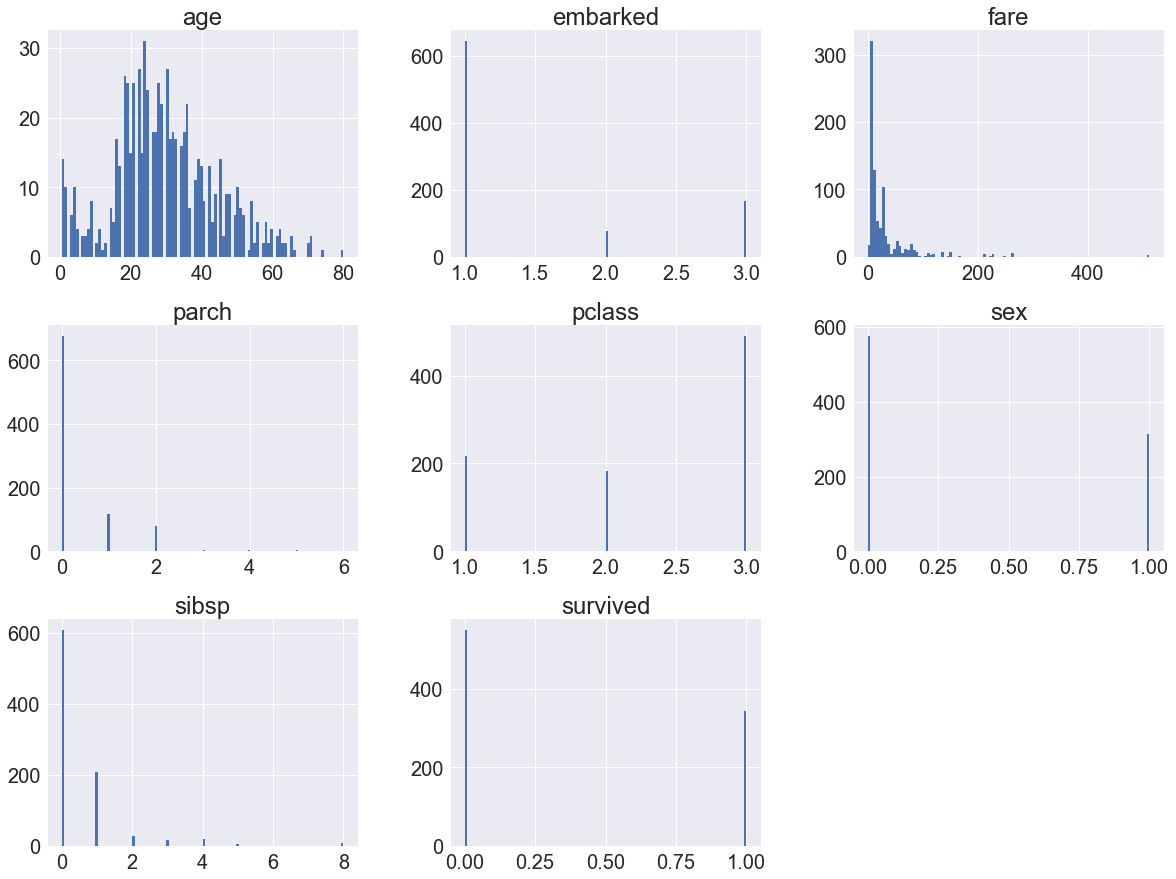

In [57]:
df.drop('passengerid', axis=1).hist(bins=100, figsize=(20,15))
plt.show()

In [58]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,9
Categorical,2
Date,0
Text (Unique),1
Rejected,0
Distinct count,89


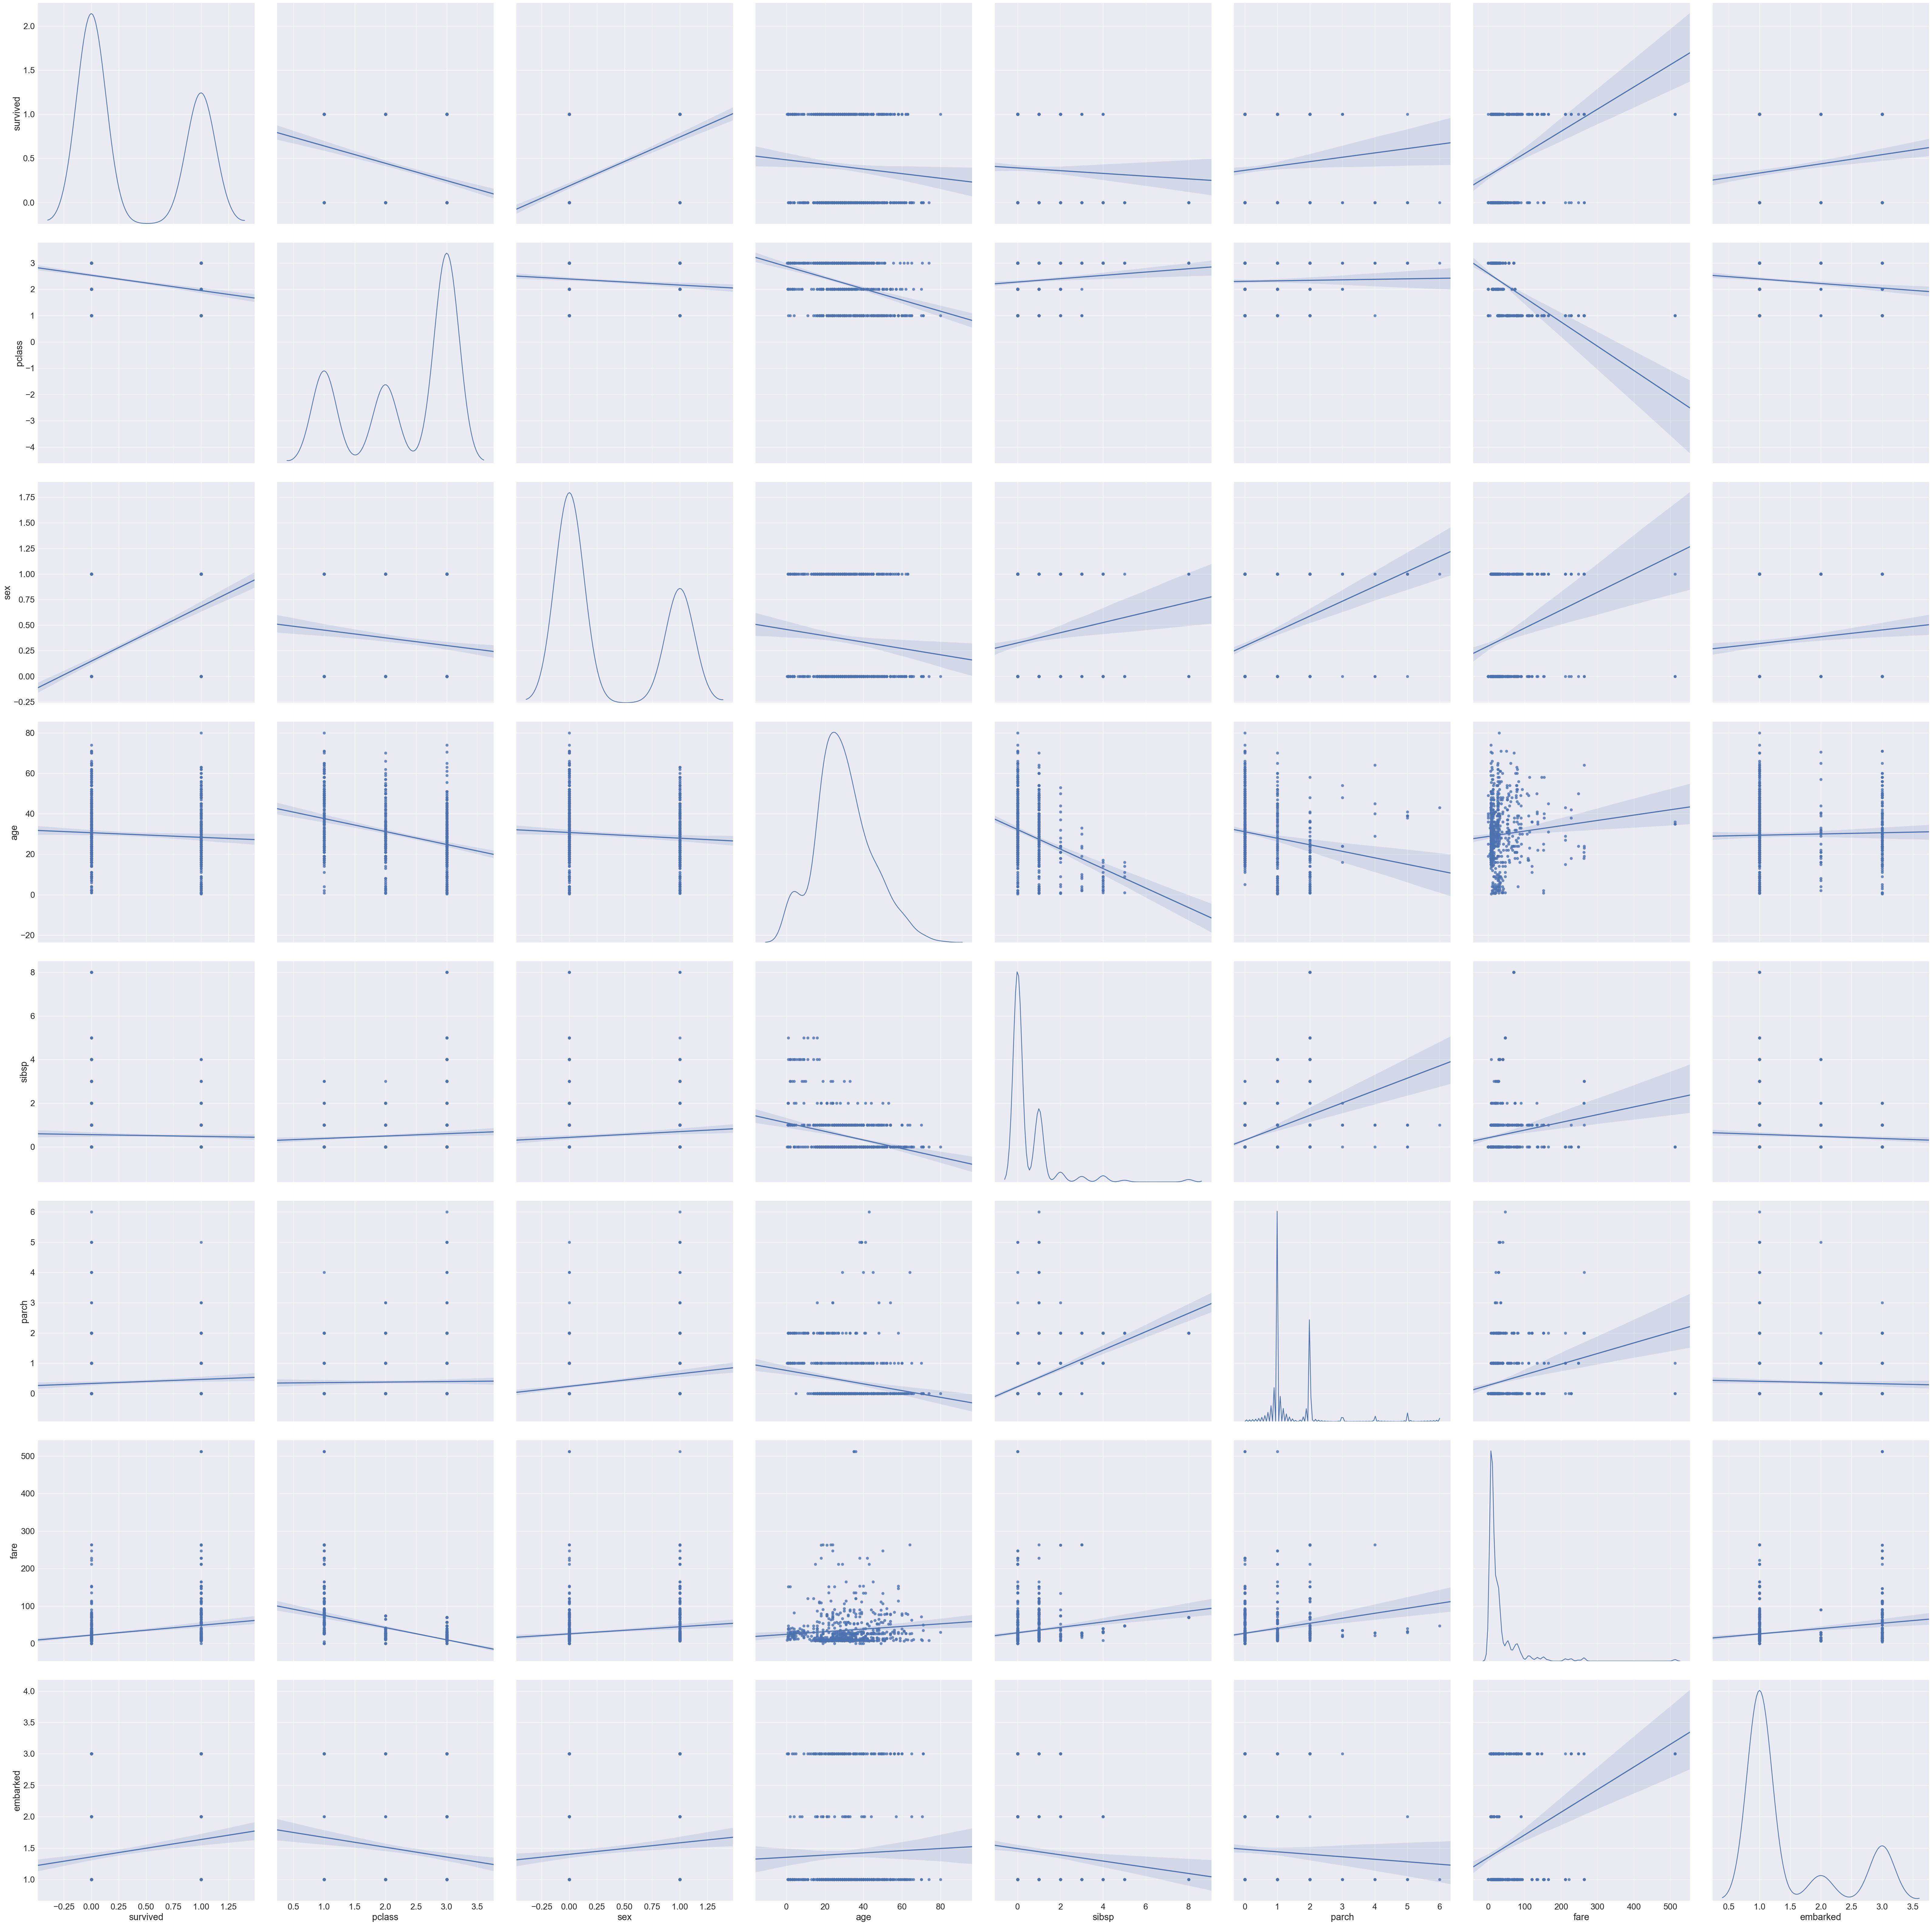

In [59]:
# Making the fonts bigger
sns.set(font_scale=2)

# Running the pairplot
pairplot1 = sns.pairplot(
    data=df.drop('passengerid', axis=1), 
    diag_kind='kde',
    kind="reg",
    size=8
)

**Missing Data**

Before we start to draw conclusions from our exploratory analysis, one thing that's worth notin is that we can see from the profile report that there's a lot of missing data in the dataframe. Whilst under normal circumstances this is far from ideal from a **feature engineering** perspective it's fantastic as it allows us to explore some new techniques and concepts.

Additionally there's a nice Python package called `missingno` that allows us to visualise the missing values in the dataset. Let's install this now and use it to visualise the missing data.

In [60]:
# import sys
# !{sys.executable} -m pip install missingno
import missingno

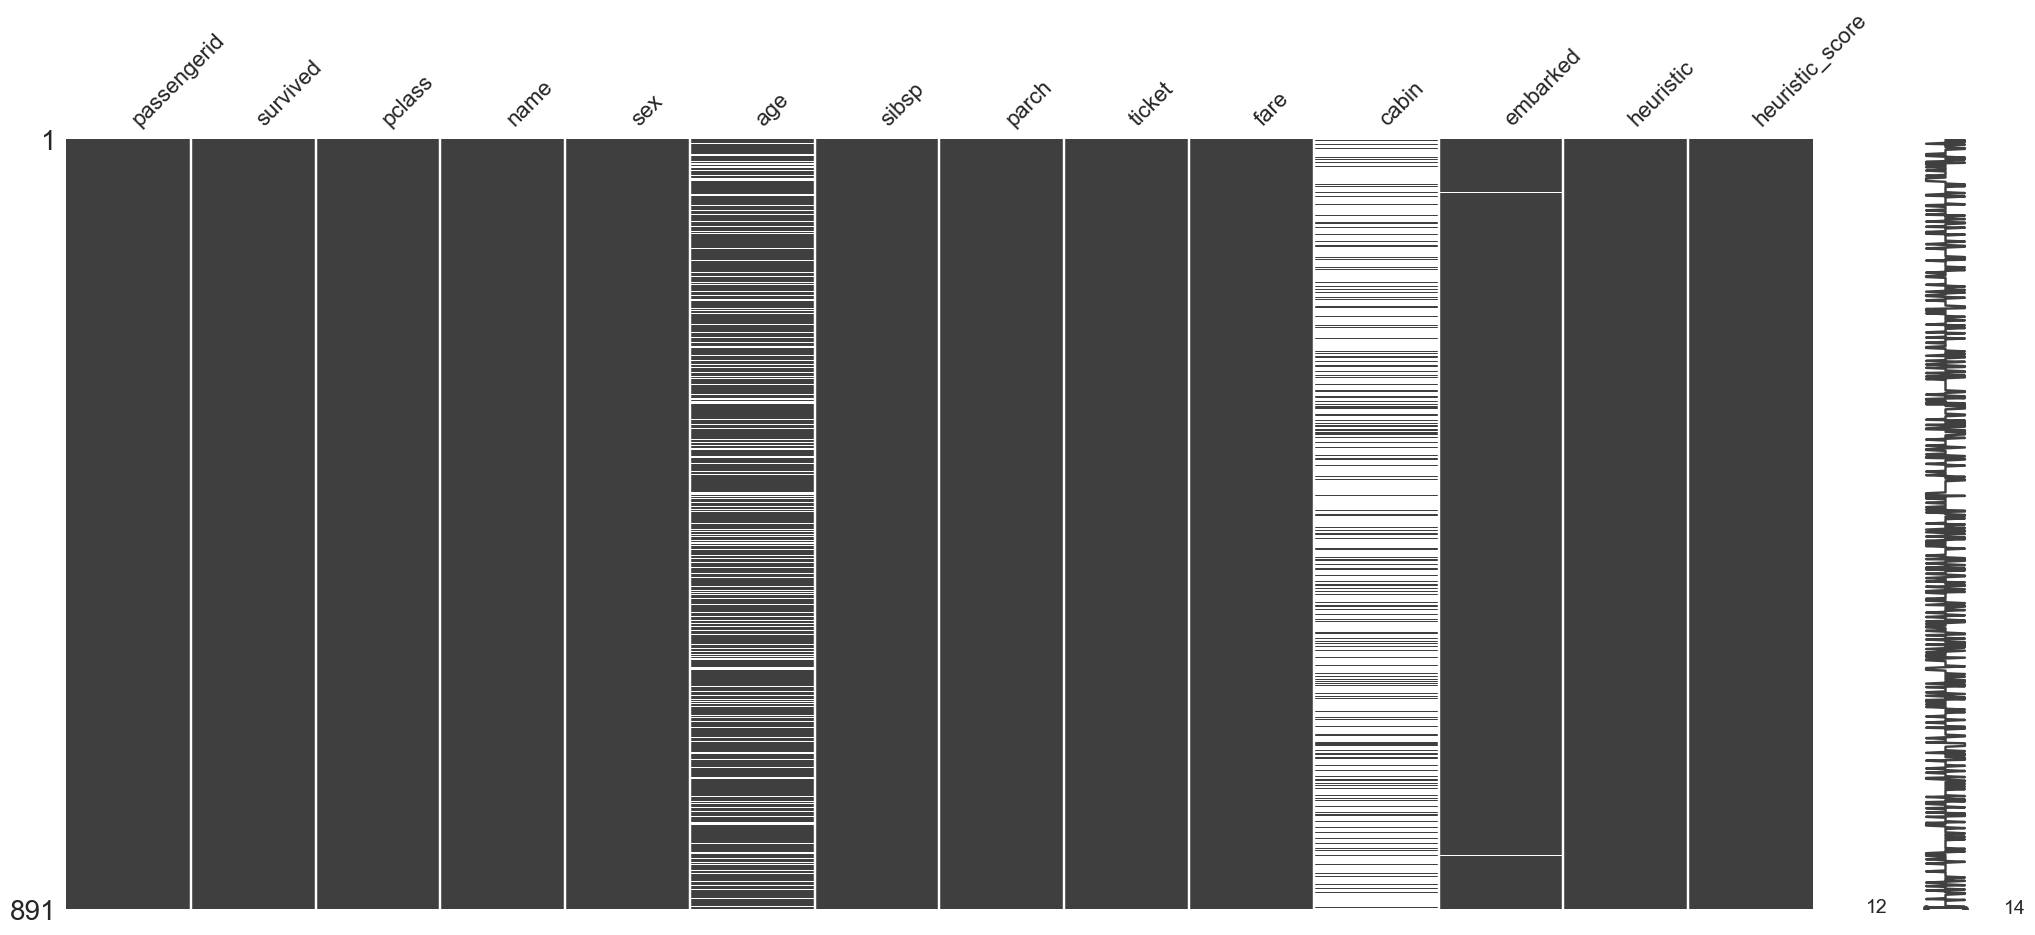

In [64]:
missingno.matrix(df)

We can see here that the missing data is largely confined to the `age` and `cabin` variables, although there are a couple in the `embarked` column also. We should treat these variables with caution until we can figure out a way to minimise the impact of the missing values.

**Eyeballing your Data**  

The last step is to actually open your data (or a statistically selected sample of your data if it's too big) in a spreadsheet and have a look through it. There are many reasons for this but for me, it can provide clues or hypotheses to test as you might notice things such as badly input data, biases (e.g. Interviewer bias in the case of samples) that aren't necessarily apparent when you conduct high level analysis.

Additionally many of the tools we've used above to explore our dataset aren't applicable to categorical variables, so giving these a little more scrutiny can't necessarily be a bad thing.

**Data Exploration Conclusions**

1. As mentioned previously there's a lot of missing data, particularly for the `age` and `cabin` variables.
2. There are a couple of extreme outliers in the `fare` variable
3. Generally:
    * Females had a much better chance of surviving
    * Those in higher classes had a better chance of surviving
    * Those who paid more for their fare had a better chance of surviving (although there is an outlier here)
    * Younger people had a better chance of surviving
   

**Other things to consider...**

There are a couple of other things we need to bear in mind when looking at this dataset.

1. As previously mentioned this is a training dataset, so it's not a full record.
2. Additionally, this is also a dataset of the passengers. It doesn't contain any details of crew survival rates.
3. We don't know how a lot of the data was gathered. Did it come from a single record? Or were things pieced together and inferred? The `age` and `cabin` variables are good indicators of this since they are both incomplete and contain some strange values (e.g. minimum `age` = 0.42 🧐)

It would important to bear these three things in mind and caveat our findings accordingly if we planned to present them!

**Step 2: Establishing a Baseline**  

The next step in the process is to establish a baseline level of prediction. This is vital because:  

1. We need to know if ML is appropriate. Can we improve upon more traditional methods?
2. We'll want to see the impact of the various thing we do on the performance of our models. Only then can we know if we're getting better!

There are two things we can do to set a baseline measure:

1. Build a very simple [heuristic](https://en.wikipedia.org/wiki/Heuristic) measure not using ML at all. A heuristic is a very quick and basic approach to problem solving. Think common sense, educated guesses and intuition.
2. Build a very simple ML algorithm that requires a minimum of effort.

We're going to explore both of these now.

**Heuristic Measure**  

As mentioned above a heuristic approach should be very quick and simple, but also encompass an element of thought and intuition, so we can't just build a random number generator! From the introductory text to our task, we were told that certain groups had better survival rates than others, particularly women, children and those travelling in better classes. So let's start by writing some simple code that assumes that if someone is female, they survived.

In [65]:
def heuristic(row):
    '''
    Simple heuristic function that assumes survival
    if a passenger is female.
    '''
    if row['sex'] == 2:
        return 1
    else:
        return 0
    
df['heuristic'] = df.apply(heuristic, axis=1)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,heuristic,heuristic_score
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,0,1


In [66]:
def heuristic_score(row):
    '''
    Checks the heuristic measure against actual
    survival
    '''
    if row['heuristic'] == row['survived']:
        return 1
    else:
        return 0
    
df['heuristic_score'] = df.apply(heuristic_score, axis=1)
print(
    'Heuristic Performance: ',
    round((df['heuristic_score'].sum() / len(df))*100,1),
    '%'
)

Heuristic Performance:  61.6 %


Wow!! Our heuristic measure scored **78.7%**!! 

This sets the bar pretty high for our ML algorithm, but it's also a worthwhile lesson for the real world also. If this were a real ML task we might have a customer or client who wants an answer and they may not necessarily care about how we get it. It may be that our heuristic measure is a good enough score for them to do whatever they need to do and as such you may have concluded your ML project in just a few lines of code!

Additionally you now have something 'done'. I cannot stress enough the importance of having something in your back pocket to appease worried clients! Not only do you have an 'if all else fails' option but achieving something early and iterating is in keeping with the [Agile philosophy](https://development.robinwinslow.uk/2014/01/10/agile-philosophy/) and helps build trust and confidence in your skills and ability to deliver.

There's also another lesson here: Not to do ML for the sake of it! Everyone loves an alluring 'shiny thing', but a simple thing that works is better than a shiny thing that doesn't.

**A simple model**

With our heuristic measure in our back pocket, we can now construct a simple Logistic Regression model. We'll be making it a little more complex than our previous models in that we'll be putting four parameters into it instead of three. This is called [Multinomal Logistic Regression](http://www.statisticshowto.com/multinomial-logistic-regression/) and whilst scikit-learn will handle this automatically without the need for further input from us, rest assured we'll be delving deeper into the algorithms and what's going on later in the course.

The features we'll be putting in are `pclass`, `sex`, `age` and our label will obviously be `survived`.

However we do have one issue - ML algorithms don't generally like missing values and our `age` variable has a lot of them. A quick and simple solution to this is to simply replace the missing values with the mean age as follows:

In [27]:
df_simple = df.copy()
df_simple['age'] = df_simple['age'].fillna(df_simple['age'].mean())

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')

# Our data
features = df_simple[['pclass','sex','age']]
label = df_simple[['survived']]

# Our model
model = LogisticRegression() 
scores = cross_val_score(
    model, 
    features, 
    label, 
    cv=50
)
print('Logistic Regression Performance: {}%'.format(round(scores.mean()*100,1)))

Logistic Regression Performance: 79.4%


Phew!! Our ML algorithm beat our heuristic measure by an enormous **0.7%**. Congratulations!! You still have jobs as ML Engineers / Data Scientists / Whatever the correct term is nowadays!

The last thing we'll do is turn our model into a function. We're going to be running it a lot over the coming chapters to measure the improvements that we make so this makes a lot of sense:

In [67]:
def log_reg_model(features, label):
    '''
    Runs a simple Logistic Regression Model to measure
    performance.
    '''
    
    model = LogisticRegression() 
    scores = cross_val_score(
        model, 
        features, 
        label, 
        cv=50
    )
    
    print('Logistic Regression Performance: {}%'.format(round(scores.mean()*100,1)))

**Conclusion**

So in this chapter we did a lot of data exploration and found out more about our dataset. We then built some very quick and simple baseline measures in order to measure performance later on down the line.

But there is still a lot more for us to do. We have a lot of other data to consider and we've not even begun to look at tweaking the parameters of our model yet. We'll be exploring these in the upcoming chapters.

#### Sources & Further Reading  



[Exploring Survival on the Titanic](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic)  